In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
df = pd.read_csv("../dataset/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [42]:
df.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [43]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


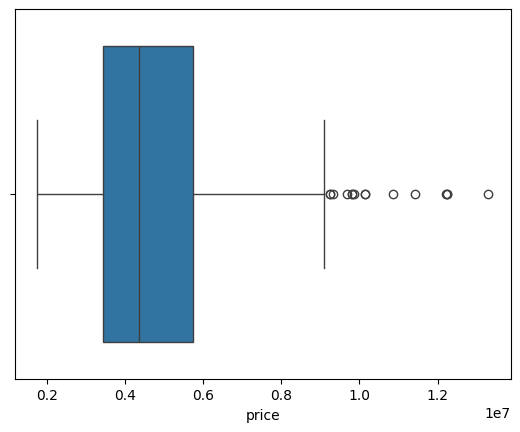

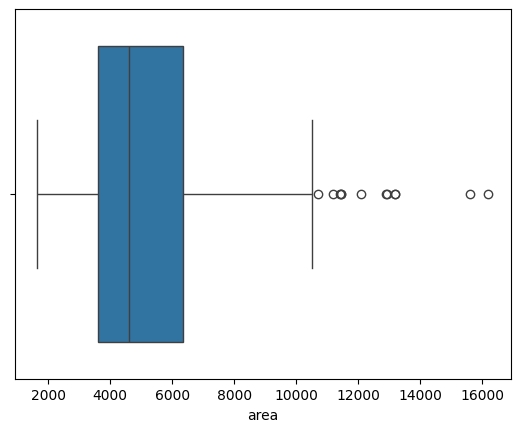

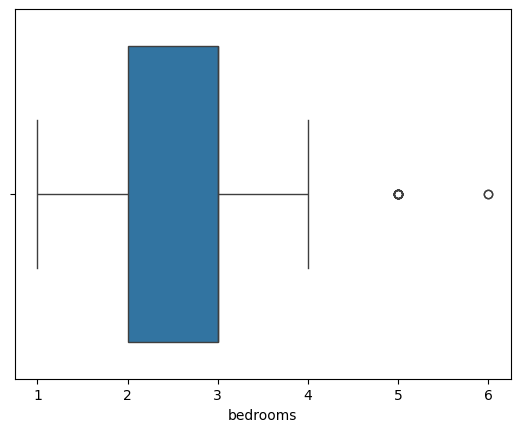

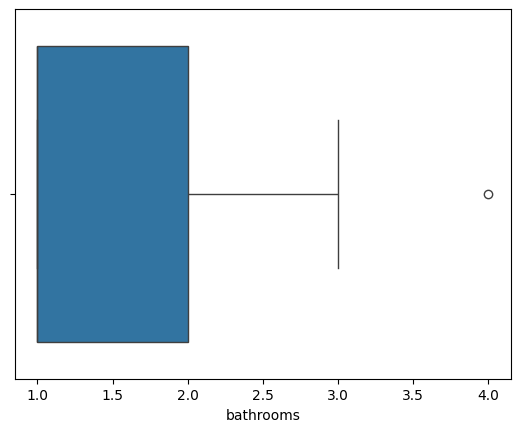

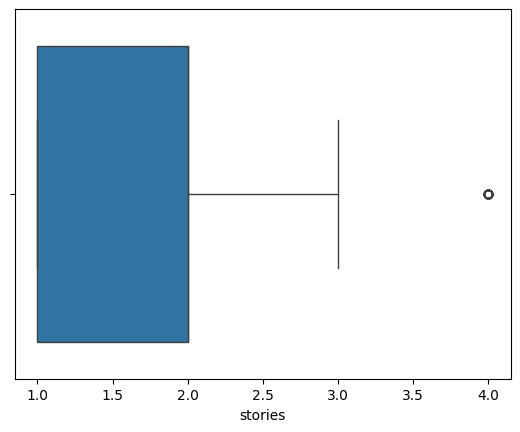

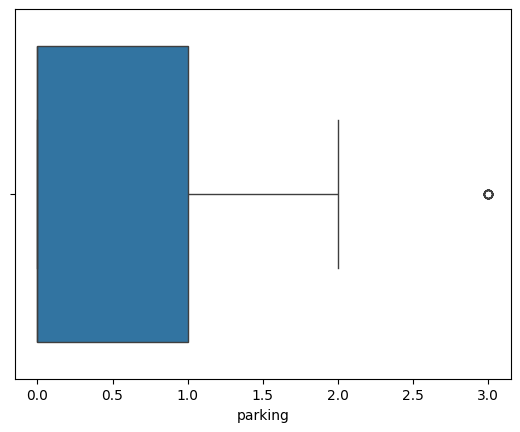

In [45]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [46]:
def wisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3 - q1
    lw = q1 - 1.5*iqr
    uw = q1 + 1.5*iqr
    return lw,uw
       
for i in ["area"]:
    lw,uw = wisker(df[i])
    df[i]=np.where(df[i] < lw,lw,df[i])
    df[i]=np.where(df[i] > uw,uw,df[i])

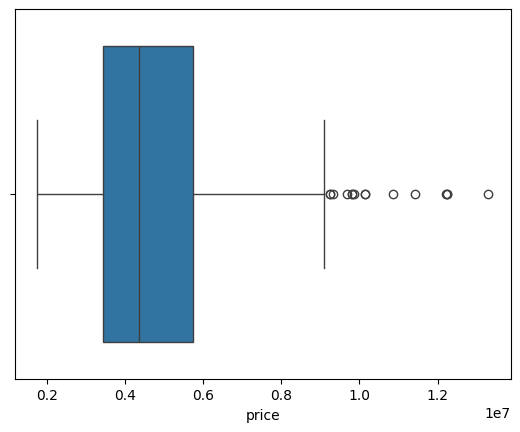

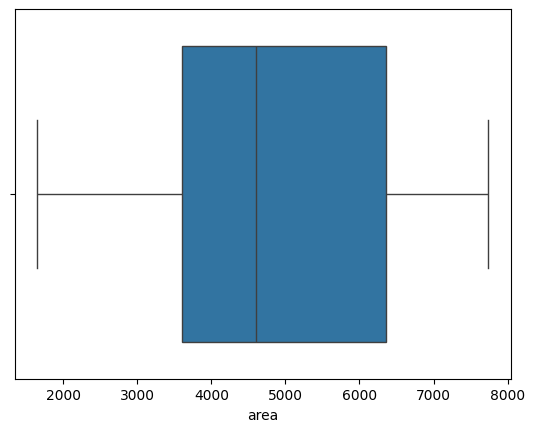

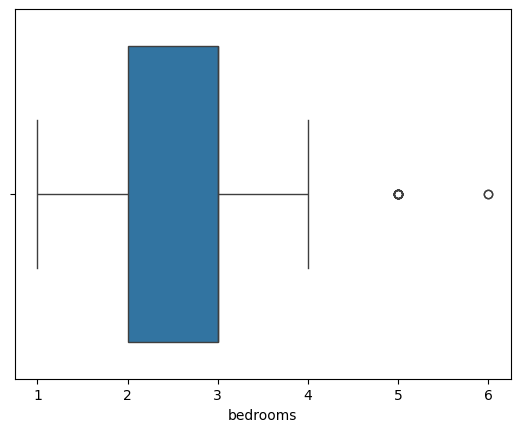

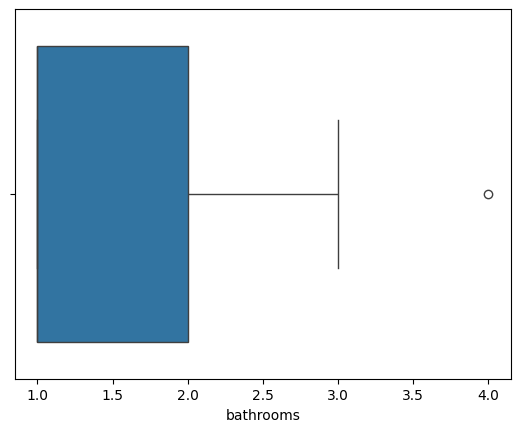

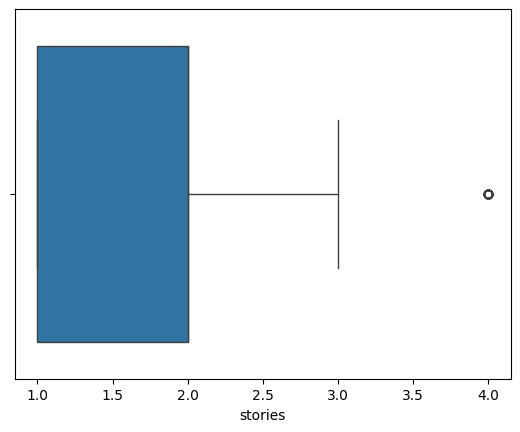

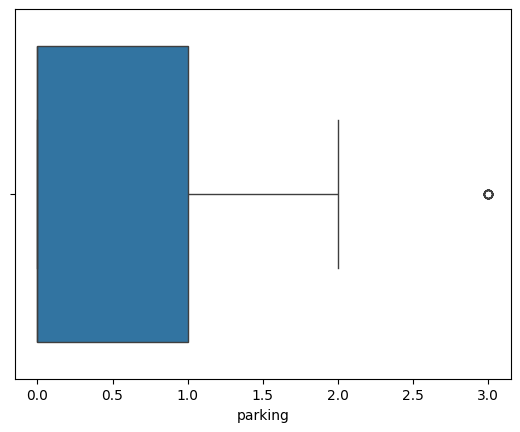

In [47]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [48]:

X = df[['area']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
print(len(X_train))
print(len(X_test))


436
109


In [50]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Make predictions on the testing data
y_pred = model.predict(X_test)


In [52]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 3604344920238.61
R-squared: 0.29


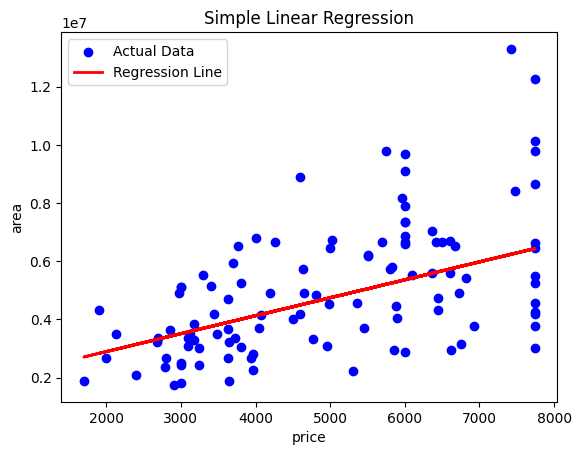

In [53]:
# Plot the regression line and data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line', linewidth=2)
plt.xlabel('price')
plt.ylabel('area')
plt.legend()
plt.title('Simple Linear Regression')
plt.show()

In [54]:
# Interpret the model's coefficients
slope = model.coef_[0]
intercept = model.intercept_

print(f'Slope (Coefficient): {slope:.2f}')
print(f'Intercept: {intercept:.2f}')

Slope (Coefficient): 617.06
Intercept: 1660985.36
